In [1]:
##mount your drive 
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## COVID-19 QUESTION ANSWER SYSTEM. Did you find an interesting article and want to easily find related research without browsing all existing publications yourself? DO you want to find important sentnces regarding your query in the papers? Do you have a specific research question and want to discover relevant articles? Then this work might help you. Our model can help you with all of your queries

**Approach**:
We, as a multi-disciplinary research group (three program developers, a biologist, and a physician), conducted lots of surveys on the Coronavirus-related family on Kaggle provided articles. Our programmer members designed a dataset, as an efficient search engine, to find the most related answers to questions of the Kaggle’s competition. Our biologist and physician members use questions of the competition to evaluate and score our search engine. We use two approaches to evaluate the accuracy and efficiency of our data set. First, we evaluated our result by searching according to the exact word and sentences of task questions, and compare its result by related keywords, which we found in related publications. Our analysis shows that by using lots of related keywords, we can access to the most relevant articles and relevant sentences.
Furthermore, our programmers used two algorithms to find related articles. Our first algorithms prepared based on finding an article according to the title of the paper, and the second approach was finding paper by searching the content of the article. According to our scoring system for these two methods, we convinced that the searching content of the articles would provide more related articles.
As a final survey, we compare our results by another data set on this competition to fix our possible errors. fortunately, we are happy to announce that our results were meaningfully much more accurate compare to similar search engines as a final survey we compare our result by another data set on this competition in order to fix our possible errors. 

**Quickstart possible**: You don't have to train the model yourself, you can simply load it from the output files!

---

___

** Features**
* Similarity measure to show the **confidence** in the recommendations
* Plots that show the **topic-distribution** of an article
* Select a **time range** to limit the articles that are considered (you can decide if you want to find the latest publications or search for insights in past research)
* Option to only suggest **COVID-19-papers** (those that contain COVID-19, SARS-CoV-2, 2019-nCov, SARS Coronavirus 2 or 2019 Novel Coronavirus in the text body)

**Following are the steps we followed to build the model based on the searching content of the articles would provide more related articles-**


**WORD2VEC-**

* For each of the paper present, we used three column of the dataset- Title, Abstract and Body text and combined them to form a ‘complete text’  containing all the text present in each of the paper.
*Then we performed pre-processing on the ‘complete text’.  We used scispaCy,  a Python package containing spaCy models for processing biomedical, scientific or clinical text. We removed the stop words and perform word lemmatization on the text data. We also removed some common unnecessary words such as author, figure, copyrights, license, fig. Etc from the  ‘complete text’. 
* We used ‘Gensim’ Python library to train our word2vec model on the  ‘complete text’ for each of the paper present in the dataset. We then save the word2vec model for the future uses.

**LDA TOPIC MODELING and FINDING ANSWERS TO THE QUERY-**

* We trained a LDA(Latent Dirichlet Allocation) model for topic modeling on the given dataset. In topic modeling each topic is a distribution over words and each document/paper is a mixture of topics  We discovered 50 as optimum number of topics.
*Each paper was assigned a set of topic that is, Each paper is a mixture of topics / a distribution. We have a LDA space, a simplex. The dimensionality of the space depends on the number of topics. .I.e. 50. Each paper is close to the most strong topics that represent it.  
* We then used Jensen-Shannon distance to measure the similarity between two probability distribution.
* Now, for the given query we used the Jensen-Shannon distance between the user query and the papers present in the topic space to find the top 50 relevant paper which is closest to the user query and might contain the answer to the query. As a similarity measure we use 1 - Jensen-Shannon distance. Higher the similarity score more close the paper is to the query.
* We then convert each paper into a set of sentences. We combine all the sentences in a list that is generated from the relevant papers. Using our word2vec model to generate a vector representation of each sentence. 
* We also form a query vector from the user query. Finally using Cosin similarity score, out of all the generated sentences from the 50 relevant papers, based on the similarity sore we take top 80 sentences as the most probable answer to the query.
* We then group the sentences based on the paper they belong to. We take maximum of top 10 best sentence for each paper and present it to the user. 


**Pros**:
* Doesn't only use the title or meta-data, but the actual content (text body) of the articles 
* Once trained, the model is easy and fast to apply
* Helps to discover latent relationships between articles that might drive innovation
* Finding related sentences to the questions in articles.
* Using query rewriting to expand the query and add related information to the query from data set.

**Cons**:
* Unsupervised learning of topics is hard to verify

___


*Topic = Distribution over Words*

*Document = Mixture of Topics*

# Install/Load Packages

*Internet access needs to be switched on for this to work!*

In [2]:
from IPython.utils import io
with io.capture_output() as captured:
    !pip install scispacy
    !pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.4/en_core_sci_lg-0.2.4.tar.gz

In [3]:
import numpy as np 
import pandas as pd
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import scispacy
import spacy
import en_core_sci_lg
from scipy.spatial.distance import jensenshannon
import joblib
from IPython.display import HTML, display
from ipywidgets import interact, Layout, HBox, VBox, Box
import ipywidgets as widgets
from IPython.display import clear_output
from tqdm import tqdm
from os.path import isfile
import seaborn as sb
import matplotlib.pyplot as plt
plt.style.use("dark_background")
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.stem import PorterStemmer
import regex as re
from gensim.models import Word2Vec
from gensim.models import Phrases
from gensim.models.phrases import Phraser
import time
from contextlib import suppress
from sklearn.metrics.pairwise import cosine_similarity
from pandas import HDFStore, DataFrame, read_csv, concat
import tables
import warnings
#from rank_bm25 import BM25Okapi
import gensim
from scipy.spatial import distance
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from nltk.corpus import wordnet    
import csv
from datetime import datetime
from itertools import chain
from collections import defaultdict
import itertools
from itertools import chain, combinations
import random
from collections import Counter
import sys
import warnings
lemmatizer = WordNetLemmatizer()
porter = PorterStemmer()

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
lemmatizer = WordNetLemmatizer()
porter = PorterStemmer()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Load and Prepare Data

In [4]:
filepath = '/content/drive/My Drive/dataset/'
df = pd.read_csv(filepath +'cord19_df2.csv')
model = Word2Vec.load(filepath +'covid_w2v_model_2')
all_texts = df.body_text

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [5]:
def sentences(recommended):
  recommended['abstract'] = recommended['abstract'].astype(str) 
  recommended['body_text'] = recommended['body_text'].astype(str) 
  recommended['title'] = recommended['title'].astype(str) 
  recommended['complete_text'] = recommended[['title','abstract', 'body_text']].agg('. '.join, axis=1)
  recommended['sentences'] = ''
  recommended['token_clean_sentences'] = ''
  recommended['vector_set'] = ''
  recommended['vector_set'] = ''
  recommended['prc_sents'] = ''
  sentences_dataset = []
  for i in range(0,len(recommended)):
      paper_sentences = []
      paper_sentences = recommended.complete_text.values[i].split('.')
      sentences_dataset = sentences_dataset + paper_sentences
      recommended.at[recommended.index[i], 'sentences'] = paper_sentences
  #clean sentences which contain lower than 7 words 
  #tokenization
  ind = -1
  for paper_sentences in recommended.sentences.values:
    tokenised_sents_set = []
    clean_sent = []
    ind = ind + 1
    print(ind)
    paper_id = recommended.index[ind]
    for sentences in paper_sentences:
      if bool(sentences):
          sentences = sentences +" "+str(paper_id)
          input_str = sentences
          tokens = word_tokenize(input_str)
          stop_words = set(stopwords.words('english'))
          new_words = ['doi', 'preprint', 'copyright', 'peer', 'reviewed', 'org', 'https', 'et', 'al', 'author', 'figure', 'rights', 'reserved', 'permission', 'used', 'using', 'biorxiv', 'medrxiv', 'license', 'fig', 'fig.', 'al.', 'Elsevier', 'PMC', 'CZI','-PRON-']
          stop_words = stop_words.union(new_words)
          tokenised_sents = [i for i in tokens if not i in stop_words]
          tokenised_sents = [i for i in tokenised_sents if len(i)>2]
          tokenised_sents = [lemmatizer.lemmatize(w) for w in tokenised_sents]
          if len(tokenised_sents) > 7:
            tokenised_sents_set.append(tokenised_sents)
            clean_sent.append(sentences)
    recommended.at[recommended.index[ind], 'token_clean_sentences'] = tokenised_sents_set
    recommended.at[recommended.index[ind], 'prc_sents'] = clean_sent
  return(recommended , sentences_dataset)

In [6]:
# medium model
nlp = en_core_sci_lg.load(disable=["tagger", "parser", "ner"])
nlp.max_length = 2472506
def spacy_tokenizer(sentence):
    return [word.lemma_ for word in nlp(sentence) if not (word.like_num or word.is_stop or word.is_punct or word.is_space or len(word)==1)]
# New stop words list 
customize_stop_words = [
    'doi', 'preprint', 'copyright', 'peer', 'reviewed', 'org', 'https', 'et', 'al', 'author', 'figure', 
    'rights', 'reserved', 'permission', 'used', 'using', 'biorxiv', 'medrxiv', 'license', 'fig', 'fig.', 'al.', 'Elsevier', 'PMC', 'CZI',
    '-PRON-'
]

# Mark them as stop words
for w in customize_stop_words:
    nlp.vocab[w].is_stop = True

We consider the text body, but the approach could also be applied to the abstracts only.

# Latend Dirichlet Allocation

For preprocessing we use [scispaCy](https://allenai.github.io/scispacy/), which is a Python package containing [spaCy](https://spacy.io) models for processing biomedical, scientific or clinical text.

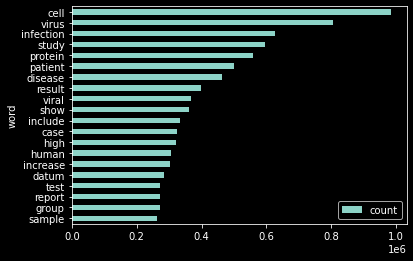

In [7]:


if not (isfile(filepath + 'vectorizer50.csv') & isfile(filepath + 'data_vectorized50.csv')):
    print('Files not there: generating')
    vectorizer = CountVectorizer(tokenizer = spacy_tokenizer, max_features=800000)
    data_vectorized = vectorizer.fit_transform(tqdm(all_texts))
    joblib.dump(vectorizer, 'vectorizer50.csv')
    joblib.dump(data_vectorized, 'data_vectorized50.csv')
else:
    vectorizer = joblib.load(filepath + 'vectorizer50.csv')
    data_vectorized = joblib.load(filepath + 'data_vectorized50.csv')
if not (isfile(filepath + 'lda50.csv')):
  print('File not there: generating')
  lda = LatentDirichletAllocation(n_components=50, random_state=0)
  lda.fit(data_vectorized)
  joblib.dump(lda, 'lda50.csv')
else:
  lda = joblib.load(filepath + 'lda50.csv') 
# most frequent words
word_count = pd.DataFrame({'word': vectorizer.get_feature_names(), 'count': np.asarray(data_vectorized.sum(axis=0))[0]})

word_count.sort_values('count', ascending=False).set_index('word')[:20].sort_values('count', ascending=True).plot(kind='barh')

## Discovered Topics

In [8]:
def print_top_words(model, vectorizer, n_top_words):
    feature_names = vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        message = "\nTopic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()
if not (isfile(filepath + 'doc_topic_dist50.csv')):
  print('File not there: generating')
  doc_topic_dist = pd.DataFrame(lda.transform(data_vectorized))
  doc_topic_dist.to_csv('doc_topic_dist50.csv', index=False)
else:
   doc_topic_dist = pd.read_csv(filepath + 'doc_topic_dist50.csv')  

is_covid19_article = df.body_text.str.contains('COVID-19|SARS-CoV-2|2019-nCov|SARS Coronavirus 2|2019 Novel Coronavirus')

def get_k_nearest_docs(doc_dist, k=5, lower=1950, upper=2020, only_covid19=False, get_dist=False):
    '''
    doc_dist: topic distribution (sums to 1) of one article
    
    Returns the index of the k nearest articles (as by Jensen–Shannon divergence in topic space). 
    '''
    
    relevant_time = df.publish_year.between(lower, upper)
    
    if only_covid19:
        temp = doc_topic_dist[relevant_time & is_covid19_article]
        
    else:
        temp = doc_topic_dist[relevant_time]
         
    distances = temp.apply(lambda x: jensenshannon(x, doc_dist), axis=1)
    k_nearest = distances[distances != 0].nsmallest(n=k).index
    
    if get_dist:
        k_distances = distances[distances != 0].nsmallest(n=k)
        return k_nearest, k_distances
    else:
        return k_nearest
def plot_article_dna(paper_id, width=20):
    t = df[df.paper_id == paper_id].title.values[0]
    doc_topic_dist[df.paper_id == paper_id].T.plot(kind='bar', legend=None, title=t, figsize=(width, 4))
    plt.xlabel('Topic')

def compare_dnas(paper_id, recommendation_id, width=20):
    t = df[df.paper_id == recommendation_id].title.values[0]
    temp = doc_topic_dist[df.paper_id == paper_id]
    ymax = temp.max(axis=1).values[0]*1.25
    temp = pd.concat([temp, doc_topic_dist[df.paper_id == recommendation_id]])
    temp.T.plot(kind='bar', title=t, figsize=(width, 4), ylim= [0, ymax])
    plt.xlabel('Topic')
    plt.legend(['Selection', 'Recommendation'])

# compare_dnas('90b5ecf991032f3918ad43b252e17d1171b4ea63', 'a137eb51461b4a4ed3980aa5b9cb2f2c1cf0292a')

def dna_tabs(paper_ids):
    k = len(paper_ids)
    outs = [widgets.Output() for i in range(k)]

    tab = widgets.Tab(children = outs)
    tab_titles = ['Paper ' + str(i+1) for i in range(k)]
    for i, t in enumerate(tab_titles):
        tab.set_title(i, t)
    display(tab)

    for i, t in enumerate(tab_titles):
        with outs[i]:
            ax = plot_article_dna(paper_ids[i])
            plt.show(ax)

def compare_tabs(paper_id, recommendation_ids):
    k = len(recommendation_ids)
    outs = [widgets.Output() for i in range(k)]

    tab = widgets.Tab(children = outs)
    tab_titles = ['Paper ' + str(i+1) for i in range(k)]
    for i, t in enumerate(tab_titles):
        tab.set_title(i, t)
    display(tab)

    for i, t in enumerate(tab_titles):
        with outs[i]:
            ax = compare_dnas(paper_id, recommendation_ids[i])
            plt.show(ax)

# Search related papers and find related sentences

As a similarity measure we use 1 - Jensen-Shannon distance.

## Sentence searching 

In [9]:
def find_sentences(recommended):
  recommended['abstract'] = recommended['abstract'].astype(str) 
  recommended['body_text'] = recommended['body_text'].astype(str) 
  recommended['title'] = recommended['title'].astype(str) 
  recommended['complete_text'] = recommended[['title','abstract', 'body_text']].agg('. '.join, axis=1)
  recommended['sentences'] = ''
  recommended['token_clean_sentences'] = ''
  recommended['vector_set'] = ''
  recommended['final_prc_sents'] = ''
  recommended['prc_sents'] = ''
  sentences_dataset = []
  for i in range(0,len(recommended)):
      paper_sentences = []
      paper_sentences = recommended.complete_text.values[i].split('.')
      sentences_dataset = sentences_dataset + paper_sentences
      recommended.at[recommended.index[i], 'sentences'] = paper_sentences
  #clean sentences which contain lower than 7 words 
  #tokenization
  ind = -1
  for paper_sentences in recommended.sentences.values:
    tokenised_sents_set = []
    clean_sent = []
    ind = ind + 1
    paper_id = recommended.index[ind]
    for sentences in paper_sentences:
      if bool(sentences):
          sentences = sentences +" "+str(paper_id)
          input_str = sentences
          tokens = word_tokenize(input_str)
          stop_words = set(stopwords.words('english'))
          new_words = ['doi', 'preprint', 'copyright', 'peer', 'reviewed', 'org', 'https', 'et', 'al', 'author', 'figure', 'rights', 'reserved', 'permission', 'used', 'using', 'biorxiv', 'medrxiv', 'license', 'fig', 'fig.', 'al.', 'Elsevier', 'PMC', 'CZI','-PRON-']
          stop_words = stop_words.union(new_words)
          tokenised_sents = [i for i in tokens if not i in stop_words]
          tokenised_sents = [i for i in tokenised_sents if len(i)>2]
          tokenised_sents = [lemmatizer.lemmatize(w) for w in tokenised_sents]
          if len(tokenised_sents) > 7:
            tokenised_sents_set.append(tokenised_sents)
            clean_sent.append(sentences)
    recommended.at[recommended.index[ind], 'token_clean_sentences'] = tokenised_sents_set
    recommended.at[recommended.index[ind], 'prc_sents'] = clean_sent
    #vectorization
    k = 0
    sentences_vector_set= []
    result_sentences = []
    for sentences_token in tokenised_sents_set:
      #print(k)
      words_vec = []
      for words in sentences_token:
          with suppress(Exception):
              words_vec.append(model[words])
      if bool(words_vec):  
        #print('**********************')   
        sents_vector = np.mean(words_vec, axis = 0)
        sentences_vector_set.append(sents_vector)
        result_sentences.append(clean_sent[k])
      #else:
        #print(ind,k)
      k = k+1      
    recommended.at[recommended.index[ind], 'vector_set'] = sentences_vector_set
    recommended.at[recommended.index[ind], 'final_prc_sents'] = result_sentences
  return(recommended,sentences_dataset)    

## Create a vector for query.

In [10]:
def query_result(data, u_query , top_result = 5):
  #user_queries = ["Seasonality of transmission"]
  user_queries = u_query 
  tokenised_queries = []
  for query in user_queries:
      cleaned_user_query = []
      input_str = query
      stop_words = set(stopwords.words('english'))
      tokens = word_tokenize(input_str)
      tokenised_query = [i for i in tokens if not i in stop_words]
      tokenised_query = [i for i in tokenised_query if len(i)>2]
      tokenised_query = [lemmatizer.lemmatize(w) for w in tokenised_query]
      cleaned_user_query.append(tokenised_query)
      tokenised_queries.append(cleaned_user_query)
  #vectorization
  queries_vector_set = []
  for i in range (len(tokenised_queries)):
      words_set = tokenised_queries[i][0]
      words_vec = []
      for words in words_set:
          with suppress(Exception):
              words_vec.append(model[words])
      query_vector = np.mean(words_vec, axis = 0)
      queries_vector_set.append(query_vector)
    # find similar
  mostsimilar_sentence_set = []
  vec1 = queries_vector_set[0].reshape(1, -1)
  sorted_results = {}
  result = {}
  top_k  = []
  i = 0
  for vector in data.vector_set.values:
    vec2 = vector.reshape(1, -1)
    dis = cosine_similarity(vec1, vec2)
    result[i] = dis
    i = i + 1
  sorted_results = {k: result[k] for k in sorted(result, key=result.get , reverse=True)}
  top_k = list(sorted_results.keys())[0:top_result]
  #print(top_k)
  mostsimilar_sentence = []
  for keys in top_k:
      #print(keys, "==" , data.final_prc_sents.values[keys])
      mostsimilar_sentence.append(data.final_prc_sents.values[keys])
  mostsimilar_sentence_set.append(mostsimilar_sentence)

  return(mostsimilar_sentence_set)

In [11]:
def related_papers():
    '''
    Creates a widget where you can select one of many papers about covid-19 and then displays related articles from the whole dataset.
    '''
    covid_papers = df[df.body_text.str.contains('COVID-19|SARS-CoV-2|2019-nCov|SARS Coronavirus 2|2019 Novel Coronavirus')][['paper_id', 'title']] # are there more names?
    title_to_id = covid_papers.set_index('title')['paper_id'].to_dict()
    
    def main_function(bullet, k=5, year_range=[1950, 2020], only_covid19=False):
        recommendation(title_to_id[bullet], k, lower=year_range[0], upper=year_range[1], only_covid19=only_covid19)
    
    yearW = widgets.IntRangeSlider(min=1950, max=2020, value=[2010, 2020], description='Year Range', 
                                   continuous_update=False, layout=Layout(width='40%'))
    covidW = widgets.Checkbox(value=False,description='Only COVID-19-Papers',disabled=False, indent=False, layout=Layout(width='20%'))
    kWidget = widgets.IntSlider(value=10, description='k', max=50, min=1, layout=Layout(width='20%'))

    bulletW = widgets.Select(options=title_to_id.keys(), layout=Layout(width='90%', height='200px'), description='Title:')

    widget = widgets.interactive(main_function, bullet=bulletW, k=kWidget, year_range=yearW, only_covid19=covidW)

    controls = VBox([Box(children=[widget.children[:-1][1], widget.children[:-1][2], widget.children[:-1][3]], 
                         layout=Layout(justify_content='space-around')), widget.children[:-1][0]])
    output = widget.children[-1]
    display(VBox([controls, output]))

# Browse Tasks

We can now also map a task or bullet point into the topic space and find related articles that might help to solve the question at hand.

Note: Some of the bullet points are very short - results might not be reliable in this case.  

In [12]:
 task1 = ["Range of incubation periods for the disease in humans (and how this varies across age and health status) and how long individuals are contagious, even after recovery.",
"Prevalence of asymptomatic shedding and transmission (e.g., particularly children).",
"Seasonality of transmission.",
"Physical science of the coronavirus (e.g., charge distribution, adhesion to hydrophilic/phobic surfaces, environmental survival to inform decontamination efforts for affected areas and provide information about viral shedding).",
"Persistence and stability on a multitude of substrates and sources (e.g., nasal discharge, sputum, urine, fecal matter, blood).",
"Persistence of virus on surfaces of different materials (e,g., copper, stainless steel, plastic).",
"Natural history of the virus and shedding of it from an infected person",
"Implementation of diagnostics and products to improve clinical processes",
"Disease models, including animal models for infection, disease and transmission",
"Tools and studies to monitor phenotypic change and potential adaptation of the virus",
"Immune response and immunity",
"Effectiveness of movement control strategies to prevent secondary transmission in health care and community settings",
 "Effectiveness of personal protective equipment (PPE) and its usefulness to reduce risk of transmission in health care and community settings",
"Role of the environment in transmission"]

task2 = ['Data on potential risks factors',
'Smoking, pre-existing pulmonary disease',
'Co-infections (determine whether co-existing respiratory/viral infections make the virus more transmissible or virulent) and other co-morbidities',
'Neonates and pregnant women',
'Socio-economic and behavioral factors to understand the economic impact of the virus and whether there were differences.',
'Transmission dynamics of the virus, including the basic reproductive number, incubation period, serial interval, modes of transmission and environmental factors', 
'Severity of disease, including risk of fatality among symptomatic hospitalized patients, and high-risk patient groups',
'Susceptibility of populations',
'Public health mitigation measures that could be effective for control']

task3 = ['Real-time tracking of whole genomes and a mechanism for coordinating the rapid dissemination of that information to inform the development of diagnostics and therapeutics and to track variations of the virus over time.',
'Access to geographic and temporal diverse sample sets to understand geographic distribution and genomic differences, and determine whether there is more than one strain in circulation. Multi-lateral agreements such as the Nagoya Protocol could be leveraged.',
'Evidence that livestock could be infected (e.g., field surveillance, genetic sequencing, receptor binding) and serve as a reservoir after the epidemic appears to be over.',
'Evidence of whether farmers are infected, and whether farmers could have played a role in the origin.',
'Surveillance of mixed wildlife- livestock farms for SARS-CoV-2 and other coronaviruses in Southeast Asia.',
'Experimental infections to test host range for this pathogen.',
'Animal host(s) and any evidence of continued spill-over to humans',
'Socioeconomic and behavioral risk factors for this spill-over',
'Sustainable risk reduction strategies']

task4 = ["Guidance on ways to scale up NPIs in a more coordinated way (e.g., establish funding, infrastructure and authorities to support real time, authoritative (qualified participants) collaboration with all states to gain consensus on consistent guidance and to mobilize resources to geographic areas where critical shortfalls are identified) to give us time to enhance our health care delivery system capacity to respond to an increase in cases.",
"Rapid design and execution of experiments to examine and compare NPIs currently being implemented. DHS Centers for Excellence could potentially be leveraged to conduct these experiments.",
"Rapid assessment of the likely efficacy of school closures, travel bans, bans on mass gatherings of various sizes, and other social distancing approaches.",
"Methods to control the spread in communities, barriers to compliance and how these vary among different populations..",
"Models of potential interventions to predict costs and benefits that take account of such factors as race, income, disability, age, geographic location, immigration status, housing status, employment status, and health insurance status.",
"Policy changes necessary to enable the compliance of individuals with limited resources and the underserved with NPIs.",
"Research on why people fail to comply with public health advice, even if they want to do so (e.g., social or financial costs may be too high).",
"Research on the economic impact of this or any pandemic. This would include identifying policy and programmatic alternatives that lessen/mitigate risks to critical government services, food distribution and supplies, access to critical household supplies, and access to health diagnoses, treatment, and needed care, regardless of ability to pay."]

task5 = ["Effectiveness of drugs being developed and tried to treat COVID-19 patients. Clinical and bench trials to investigate less common viral inhibitors against COVID-19 such as naproxen, clarithromycin, and minocyclinethat that may exert effects on viral replication.",
"Methods evaluating potential complication of Antibody-Dependent Enhancement (ADE) in vaccine recipients.",
"Exploration of use of best animal models and their predictive value for a human vaccine.",
"Capabilities to discover a therapeutic (not vaccine) for the disease, and clinical effectiveness studies to discover therapeutics, to include antiviral agents.",
"Alternative models to aid decision makers in determining how to prioritize and distribute scarce, newly proven therapeutics as production ramps up. This could include identifying approaches for expanding production capacity to ensure equitable and timely distribution to populations in need.",
"Efforts targeted at a universal coronavirus vaccine.",
"Efforts to develop animal models and standardize challenge studies",
"Efforts to develop prophylaxis clinical studies and prioritize in healthcare workers",
"Approaches to evaluate risk for enhanced disease after vaccination",
"Assays to evaluate vaccine immune response and process development for vaccines, alongside suitable animal models [in conjunction with therapeutics]"]

task6 = ["Efforts to articulate and translate existing ethical principles and standards to salient issues in COVID-2019", 
"Efforts to embed ethics across all thematic areas, engage with novel ethical issues that arise and coordinate to minimize duplication of oversight",
"Efforts to support sustained education, access, and capacity building in the area of ethics",
"Efforts to establish a team at WHO that will be integrated within multidisciplinary research and operational platforms and that will connect with existing and expanded global networks of social sciences.",
"Efforts to develop qualitative assessment frameworks to systematically collect information related to local barriers and enablers for the uptake and adherence to public health measures for prevention and control. This includes the rapid identification of the secondary impacts of these measures. (e.g. use of surgical masks, modification of health seeking behaviors for SRH, school closures)",
"Efforts to identify how the burden of responding to the outbreak and implementing public health measures affects the physical and psychological health of those providing care for Covid-19 patients and identify the immediate needs that must be addressed.",
"Efforts to identify the underlying drivers of fear, anxiety and stigma that fuel misinformation and rumor, particularly through social media."]

task7 = ["How widespread current exposure is to be able to make immediate policy recommendations on mitigation measures. Denominators for testing and a mechanism for rapidly sharing that information, including demographics, to the extent possible. Sampling methods to determine asymptomatic disease (e.g., use of serosurveys (such as convalescent samples) and early detection of disease (e.g., use of screening of neutralizing antibodies such as ELISAs).",
"Efforts to increase capacity on existing diagnostic platforms and tap into existing surveillance platforms.",
"Recruitment, support, and coordination of local expertise and capacity (public, private—commercial, and non-profit, including academic), including legal, ethical, communications, and operational issues.",
"National guidance and guidelines about best practices to states (e.g., how states might leverage universities and private laboratories for testing purposes, communications to public health officials and the public).",
"Development of a point-of-care test (like a rapid influenza test) and rapid bed-side tests, recognizing the tradeoffs between speed, accessibility, and accuracy.",
"Rapid design and execution of targeted surveillance experiments calling for all potential testers using PCR in a defined area to start testing and report to a specific entity. These experiments could aid in collecting longitudinal samples, which are critical to understanding the impact of ad hoc local interventions (which also need to be recorded).",
"Separation of assay development issues from instruments, and the role of the private sector to help quickly migrate assays onto those devices.",
"Efforts to track the evolution of the virus (i.e., genetic drift or mutations) and avoid locking into specific reagents and surveillance/detection schemes.",
"Latency issues and when there is sufficient viral load to detect the pathogen, and understanding of what is needed in terms of biological and environmental sampling.",
"Use of diagnostics such as host response markers (e.g., cytokines) to detect early disease or predict severe disease progression, which would be important to understanding best clinical practice and efficacy of therapeutic interventions.",
"Policies and protocols for screening and testing.",
"Policies to mitigate the effects on supplies associated with mass testing, including swabs and reagents.",
"Technology roadmap for diagnostics.",
"Barriers to developing and scaling up new diagnostic tests (e.g., market forces), how future coalition and accelerator models (e.g., Coalition for Epidemic Preparedness Innovations) could provide critical funding for diagnostics, and opportunities for a streamlined regulatory environment.",
"New platforms and technology (e.g., CRISPR) to improve response times and employ more holistic approaches to COVID-19 and future diseases.",
"Coupling genomics and diagnostic testing on a large scale.",
"Enhance capabilities for rapid sequencing and bioinformatics to target regions of the genome that will allow specificity for a particular variant.",
"Enhance capacity (people, technology, data) for sequencing with advanced analytics for unknown pathogens, and explore capabilities for distinguishing naturally-occurring pathogens from intentional.",
"One Health surveillance of humans and potential sources of future spillover or ongoing exposure for this organism and future pathogens, including both evolutionary hosts (e.g., bats) and transmission hosts (e.g., heavily trafficked and farmed wildlife and domestic food and companion species), inclusive of environmental, demographic, and occupational risk factors."]

task8 = ["Resources to support skilled nursing facilities and long term care facilities.",
"Mobilization of surge medical staff to address shortages in overwhelmed communities",
"Age-adjusted mortality data for Acute Respiratory Distress Syndrome (ARDS) with/without other organ failure – particularly for viral etiologies",
"Extracorporeal membrane oxygenation (ECMO) outcomes data of COVID-19 patients",
"Outcomes data for COVID-19 after mechanical ventilation adjusted for age.",
"Knowledge of the frequency, manifestations, and course of extrapulmonary manifestations of COVID-19, including, but not limited to, possible cardiomyopathy and cardiac arrest.",
"Application of regulatory standards (e.g., EUA, CLIA) and ability to adapt care to crisis standards of care level.",
"Approaches for encouraging and facilitating the production of elastomeric respirators, which can save thousands of N95 masks.",
"Best telemedicine practices, barriers and faciitators, and specific actions to remove/expand them within and across state boundaries.",
"Guidance on the simple things people can do at home to take care of sick people and manage disease.",
"Oral medications that might potentially work.",
"Use of AI in real-time health care delivery to evaluate interventions, risk factors, and outcomes in a way that could not be done manually.",
"Best practices and critical challenges and innovative solutions and technologies in hospital flow and organization, workforce protection, workforce allocation, community-based support resources, payment, and supply chain management to enhance capacity, efficiency, and outcomes.",
"Efforts to define the natural history of disease to inform clinical care, public health interventions, infection prevention control, transmission, and clinical trials",
"Efforts to develop a core clinical outcome set to maximize usability of data across a range of trials",
"Efforts to determine adjunctive and supportive interventions that can improve the clinical outcomes of infected patients (e.g. steroids, high flow oxygen)"]

task9 = ["Methods for coordinating data-gathering with standardized nomenclature.",
"Sharing response information among planners, providers, and others.",
"Understanding and mitigating barriers to information-sharing.",
"How to recruit, support, and coordinate local (non-Federal) expertise and capacity relevant to public health emergency response (public, private, commercial and non-profit, including academic).",
"Integration of federal/state/local public health surveillance systems.",
"Value of investments in baseline public health response infrastructure preparedness",
"Modes of communicating with target high-risk populations (elderly, health care workers).",
"Risk communication and guidelines that are easy to understand and follow (include targeting at risk populations’ families too).",
"Communication that indicates potential risk of disease to all population groups.",
"Misunderstanding around containment and mitigation.",
"Action plan to mitigate gaps and problems of inequity in the Nation’s public health capability, capacity, and funding to ensure all citizens in need are supported and can access information, surveillance, and treatment.",
"Measures to reach marginalized and disadvantaged populations.",
"Data systems and research priorities and agendas incorporate attention to the needs and circumstances of disadvantaged populations and underrepresented minorities.",
"Mitigating threats to incarcerated people from COVID-19, assuring access to information, prevention, diagnosis, and treatment.",
"Understanding coverage policies (barriers and opportunities) related to testing, treatment, and care"]

tasks={'What is known about transmission, incubation, and environmental stability?': task1,
       'What do we know about COVID-19 risk factors?': task2, 
       'What do we know about virus genetics, origin, and evolution?': task3, 
       'What do we know about non-pharmaceutical interventions?': task4,
       'What do we know about vaccines and therapeutics?': task5, 
       'What has been published about ethical and social science considerations?': task6, 
       'What do we know about diagnostics and surveillance?': task7,
       'What has been published about medical care?': task8, 
       'What has been published about information sharing and inter-sectoral collaboration?': task9}

In [13]:
def relevant_articles(tasks, k=3, lower=1950, upper=2020, only_covid19=False ):
    top_paper_as_relerelevant = k*20
    top_sentences_number_for_primary_analyse = k*20
    sentences_number = top_sentences_number_for_primary_analyse
    if not sys.warnoptions:
        warnings.simplefilter("ignore")
    tasks = [tasks] if type(tasks) is str else tasks 
    
    tasks_vectorized = vectorizer.transform(tasks)
    tasks_topic_dist = pd.DataFrame(lda.transform(tasks_vectorized))
    Q_number = 1
    for index, bullet in enumerate(tasks):
        print ("***************************************** Question %s *********************************************************" %(Q_number))
        print("")
        print(bullet)
        print("")
        print ("***************************************** Related papers *****************************************************")
        recommended = get_k_nearest_docs(tasks_topic_dist.iloc[index], top_paper_as_relerelevant , lower, upper, only_covid19)
        recommended = df.iloc[recommended]
        df_result , all_sentences = find_sentences(recommended)
        result_sentences_set = []
        result_vector_set    = []
        for sentences_set in df_result.final_prc_sents.values:
          result_sentences_set =  result_sentences_set + sentences_set 
        for vectors in df_result.vector_set.values:
          result_vector_set =  result_vector_set + vectors
        data = {}
        data = {'final_prc_sents' : result_sentences_set , 'vector_set' : result_vector_set }
        df_allresults_sentences_vectors = pd.DataFrame(data)
        query = [bullet]
        #step2 -------------search in top 50 realted paper to chose top k paper 
        primary_sentences_result = query_result(df_allresults_sentences_vectors, query , sentences_number)
        result_paper_id = []
        for result_sent  in primary_sentences_result[0]:
          word_list = result_sent.split()
          result_paper_id.append(word_list[-1])
        top_k_result = Counter(result_paper_id).most_common(k)


        
        top_k_paper_id = {}
        for indx in range(len(top_k_result) ):
          key = list(list(top_k_result)[indx])[0]
          value = list(list(top_k_result)[indx])[1]
          top_k_paper_id.update({key:value})
        #print(top_k_paper_id)
        #{'29312': 11, '29961': 10, '29541': 9, '29558': 8, '29966': 7, '29659': 7}
        top_k_values = list(top_k_paper_id.values())
        
        keys_sentences_dict = {}
        for keys in top_k_paper_id.keys():
          top_sent_in_paper = []
          for sentences in primary_sentences_result[0]:
            word_list = sentences.split()
            if str(keys) in word_list[-1]:  
               top_sent_in_paper.append(sentences)
          keys_sentences_dict.update ({keys : top_sent_in_paper})
        #print(keys_sentences_dict)
        #{'29312': ['\nEstimates of incubation period and serial interval from other studies are shown in Table S4  29312',..]}
        #list(keys_sentences_dict.values())[0])



        top_k_index = list(top_k_paper_id.keys())
        df_list = []
        for indx in top_k_index:
          df_list.append(recommended.loc[[int(indx)]])
        frames = df_list
        result_paper_df = pd.concat(frames)
        
        
        
        ids = 0
        for l, n in result_paper_df[['url','title']].values:
          #h = '<br/>'.join(['<a href="' + l + '" target="_blank">'+ n + '</a>' for l, n in recommended[['url','title']].values])
          h = '<br/>'.join(['<a href="' + str(l) + '" target="_blank">'+ str(n) + '</a>'])
          display(HTML(h))
          print("")
          print("================= >>> Related sentences :")
          i = 0
          for most_similar_sentences in (list(keys_sentences_dict.values())[ids]):
              if i < 10 :
                print(most_similar_sentences)
                print("")
                i = i + 1
          ids = ids +1
        Q_number = Q_number + 1 

In [14]:
def relevant_articles_for_text():    
    textW = widgets.Textarea(
        value='',
        placeholder='Type something',
        description='',
        disabled=False,
        layout=Layout(width='90%', height='200px')
    )

    yearW = widgets.IntRangeSlider(min=1950, max=2020, value=[2010, 2020], description='Year Range', 
                               continuous_update=False, layout=Layout(width='40%'))
    covidW = widgets.Checkbox(value=True,description='Only COVID-19-Papers',disabled=False, indent=False, layout=Layout(width='25%'))
    kWidget = widgets.IntSlider(value=6, description='k', max=50, min=1, layout=Layout(width='25%'))

    button = widgets.Button(description="Search")

    display(VBox([HBox([kWidget, yearW, covidW], layout=Layout(width='90%', justify_content='space-around')),
        textW, button], layout=Layout(align_items='center')))

    def on_button_clicked(b):
        clear_output()
        display(VBox([HBox([kWidget, yearW, covidW], layout=Layout(width='90%', justify_content='space-around')),
            textW, button], layout=Layout(align_items='center')))        
        relevant_articles(textW.value, kWidget.value, yearW.value[0], yearW.value[1], covidW.value)

    button.on_click(on_button_clicked)

#Search box

In [15]:
pd.options.mode.chained_assignment = None 
warnings.filterwarnings("ignore", category=tables.NaturalNameWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning) 

relevant_articles_for_text()

***************************************** Question 1 *********************************************************

the incubation period of corona virus disease

***************************************** Related papers *****************************************************



================= >>> Related sentences :
Transmission of corona virus disease 2019 during the incubation period may lead to a quarantine loophole 4343


The prior outbreak of severe acute respiratory syndrome (SARS) and Middle East respiratory syndrome (MERS), which were caused by corona virus, were reported to be rarely transmitted during the asymptomatic incubation period 4343


Our study initially demonstrated asymptomatic transmission of COVID-19 in the incubation period, especially in the last three days of incubation period, by estimating the incubation period with the use of accurate exposure history of confirmed cases 4343

 The data about virus detection were not available for those asymptomatic persons in their incubation period 4343

 Background: The ongoing outbreak of novel corona virus disease 2019 (COVID-19) in Wuhan, China, is arousing international concern 4343

 Therefore, this study provides a reliable incubation period and a strong evidence of the COVID-19 transmi


================= >>> Related sentences :
 Four corona viruses namely HKU1, NL63, 229E and OC43 have been in circulation in humans, and generally cause mild respiratory disease 23504

 Several properties of this virus make prevention difficult namely, non-specific features of the disease, the infectivity even before onset of symptoms in the incubation period, transmission from asymptomatic people, long incubation period, tropism for mucosal surfaces such as the conjunctiva, prolonged duration of the illness and transmission even after clinical recovery 23504

 The 2019 novel coronavirus (2019-nCoV) or the severe acute respiratory syndrome corona virus 2 (SARS-CoV-2) as it is now called, is rapidly spreading from its origin in Wuhan City of Hubei Province of China to the rest of the world [1] 23504


The differential diagnosis includes all types of respiratory viral infections [influenza, parainfluenza, respiratory syncytial virus (RSV), adenovirus, human metapneumovirus, non COVID-19 


================= >>> Related sentences :
 This virus causes acute lung symptoms, leading to a condition that has been named as &ldquo;coronavirus disease 2019&rdquo; (COVID-19) 41014

 A high-resolution crystal structure of SARS-CoV-2 coronavirus 3CL hydrolase (Mpro) was announced after the outbreak of COVID-19 in the world [80] , and human coronaviruses (HCoVs) have been treated as severe pathogens in respiratory tract infections 41014

 During this incubation period, patients are contagious, and it has been reported that each case infected on average 3 41014

 During this incubation period, patients are contagious, and it has been reported that each case infected on average 3 41014

 However, in a small number of patients, the incubation period may be longer than 10 days [34]  41014

 However, in a small number of patients, the incubation period may be longer than 10 days [34]  41014




================= >>> Related sentences :
 The prolonged incubation period will increase the risk of virus transmission 2639

 The rate of severe illness and death were low, whereas some patients had longer incubation period 2639


In our analysis of 44 patients with clear contact history, we found that the mean incubation period of COVID-19 was 8 2639

 The average incubation period was longer among our patients 2639

 Compared with previous studies [9, 10] , the incubation period of our patients varied more greatly with maximum of 20 days 2639




================= >>> Related sentences :

It mainly should be distinguished from other known viruses of pneumonia, such as influenza viruses, parainfluenza virus, adenovirus, respiratory syncytial virus, rhinovirus, SARS-CoV, etc 8299


In recent publications, the mean incubation period of CoVID-19 was a little bit different 8299

COM, 2020), suggesting that the new type of coronavirus may cause neonatal infection through mother-tochild transmission, which of course needs to be confirmed by more scientific studies  8299

 (2019) , with 1099 patients, reported that the estimated mean incubation period of SARS-CoV-2 infection was 3 8299

 Recently, new coronavirus was detected in the feces of confirmed patients in Wuhan, Shenzhen and even the first case in the United States, indicating that the virus can exist and replicate in the digestive tract, suggesting the possibility of fecaloral transmission (Holshue et al 8299




================= >>> Related sentences :
 For the incubation period, considering the characteristics of the patients in this study, the time of the first infection with the novel coronavirus was difficult to be precise, so it was not discussed 3954

 These characteristics were different from other highly infectious respiratory virus infections 3954

 Since the patient could only be released from quarantine after three consecutive negative nucleic acid test results, and each test interval was 24 hours, and the incubation period reported in previous literature was considered [1] , the average duration of virus release in this study should be similar to that of professor Cao Bin's study  3954

 The most important basis for release from quarantine is the persistence of negative nucleic acid test results, so the duration from onset to release form quarantine reflects the time it takes the patient to release the virus from the respiratory tract 3954

